In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#change the path to get the location of data
%cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


# Data Preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier

In [6]:
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Check for Null Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

NO missing value in the data set. 

### Visualization

In [8]:
cols=list(df.columns)

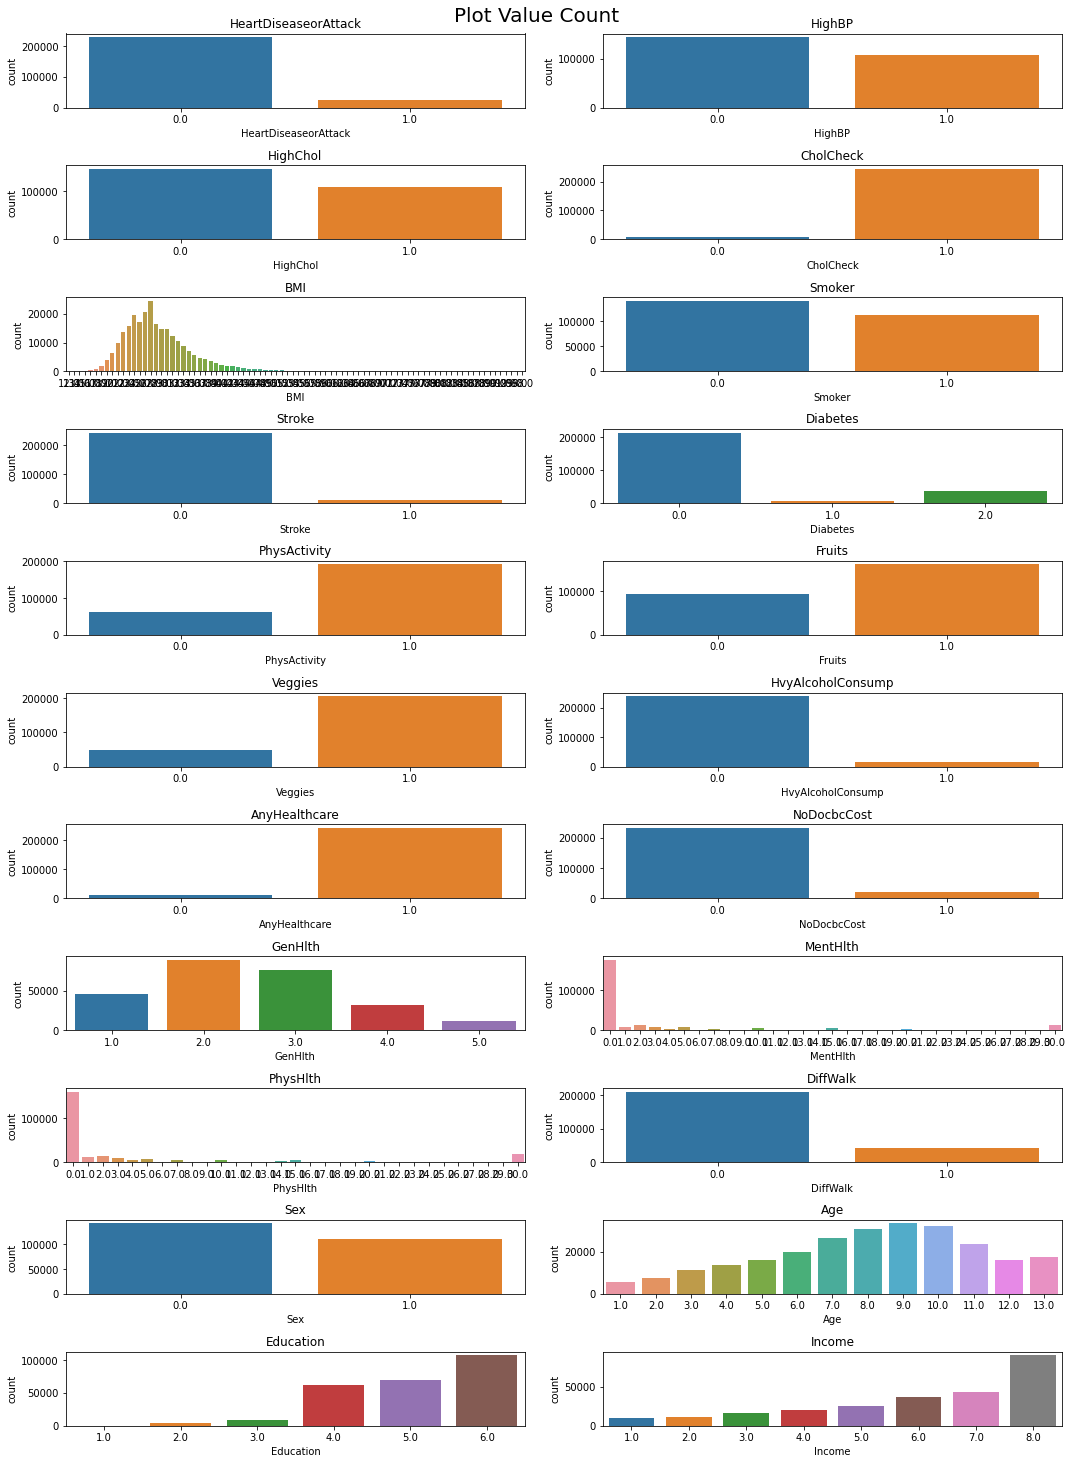

In [11]:
plt.figure(figsize=(15,40))
for i,column in enumerate(cols):
    plt.subplot(len(cols), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

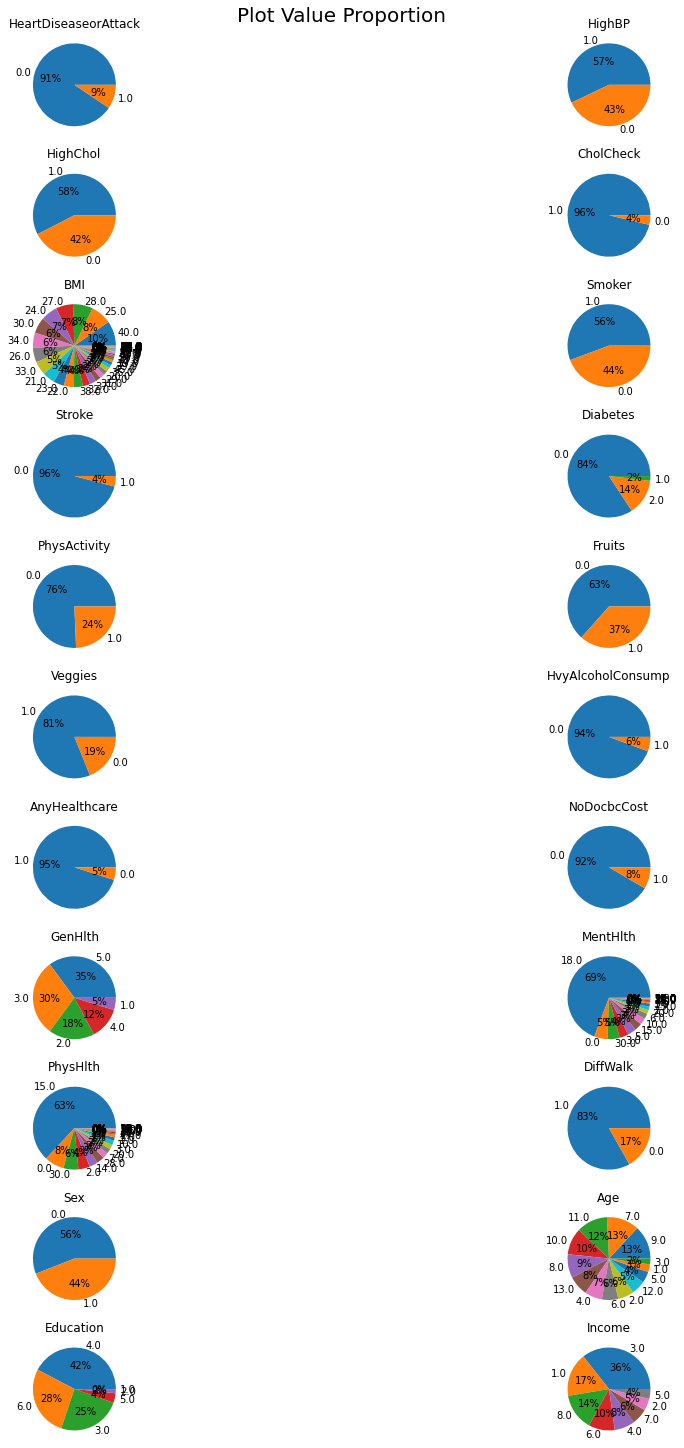

In [12]:
plt.figure(figsize=(15,40))
for i,column in enumerate(cols):
    plt.subplot(len(cols), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20, x=0.5, y=1)
    plt.pie(x=df[column].value_counts(), labels=df[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

### Check Outliers

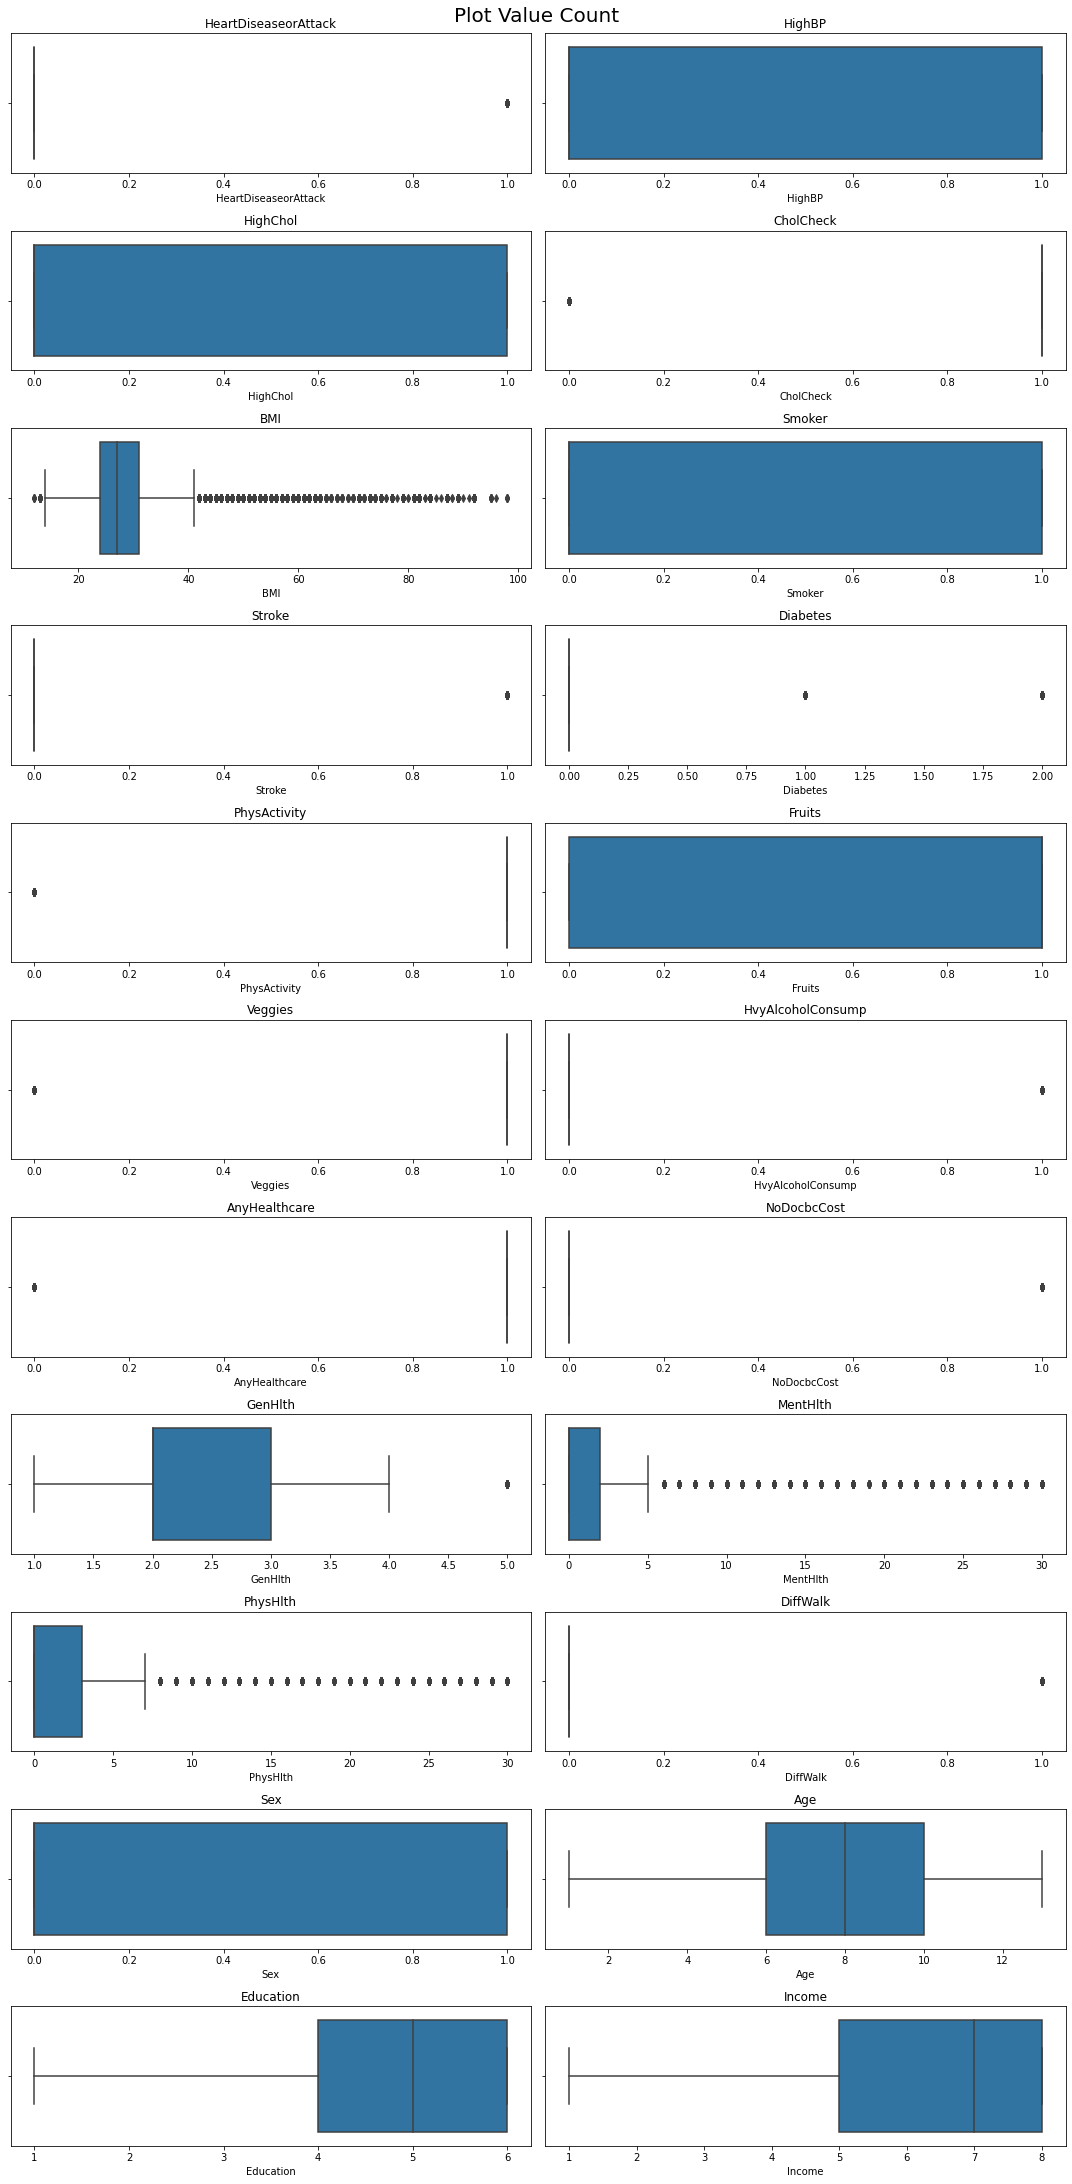

In [13]:
plt.figure(figsize=(15,60))
for i,column in enumerate(cols):
    plt.subplot(len(cols), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.boxplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

### Convert categorical variables to dummy variables

In [14]:
# find the categorical variables and encoded.

# categorical variables
catcols = ['HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'DiffWalk', 'Sex', 
       ]
#convert the data type of categorical variables
for cat in catcols:
    df[cat]=pd.Categorical(df[cat])
    

In [15]:
df.dtypes

HeartDiseaseorAttack     float64
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
Diabetes                category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                  float64
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                      float64
Education                float64
Income                   float64
dtype: object

In [16]:
# convert categorical variables into dummy variables
df=pd.get_dummies(df, drop_first=True)

In [17]:
# show firt five records and data size
display(df.head())
display(df.shape)

,HeartDiseaseorAttack,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,HighBP_1.0,HighChol_1.0,CholCheck_1.0,Smoker_1.0,Stroke_1.0,Diabetes_1.0,Diabetes_2.0,PhysActivity_1.0,Fruits_1.0,Veggies_1.0,HvyAlcoholConsump_1.0,AnyHealthcare_1.0,NoDocbcCost_1.0,DiffWalk_1.0,Sex_1.0
0,0.0,40.0,5.0,18.0,15.0,9.0,4.0,3.0,1,1,1,1,0,0,0,0,0,1,0,1,0,1,0
1,0.0,25.0,3.0,0.0,0.0,7.0,6.0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,0.0,28.0,5.0,30.0,30.0,9.0,4.0,8.0,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0
3,0.0,27.0,2.0,0.0,0.0,11.0,3.0,6.0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,0
4,0.0,24.0,2.0,3.0,0.0,11.0,5.0,4.0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0


(253680, 23)

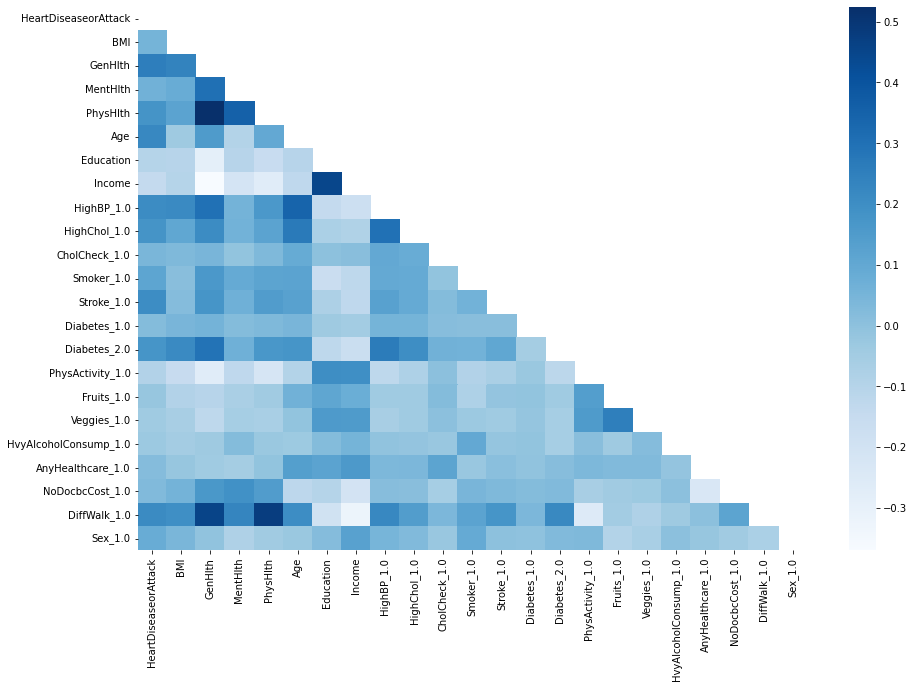

In [18]:
plt.figure(figsize=(15,10))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask, cmap='Blues',annot=False) 
plt.show()

In [19]:
np.sum(df.corr()>0.6)

HeartDiseaseorAttack     1
BMI                      1
GenHlth                  1
MentHlth                 1
PhysHlth                 1
Age                      1
Education                1
Income                   1
HighBP_1.0               1
HighChol_1.0             1
CholCheck_1.0            1
Smoker_1.0               1
Stroke_1.0               1
Diabetes_1.0             1
Diabetes_2.0             1
PhysActivity_1.0         1
Fruits_1.0               1
Veggies_1.0              1
HvyAlcoholConsump_1.0    1
AnyHealthcare_1.0        1
NoDocbcCost_1.0          1
DiffWalk_1.0             1
Sex_1.0                  1
dtype: int64

No strong correlation among variables

### Checking the distribution of target variable

In [20]:
df.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

The dataset is imbalanced. Therefore, accuracy will not be an appropriate way to evaluate the model performance. We will use confusion matrix and ROC curve to evaluate models. Meanwhile, in the following models, class_weight parameter is set to "balanced", which automatically assign higher weight on lower frequency of class.

# Data splitting

In [21]:
#select HeartDiseaseorAttack as target variable:
y = df['HeartDiseaseorAttack']

#select all the other columns minus HeartDiseaseorAttack as the feature variables:
X = df.drop(['HeartDiseaseorAttack'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print('Dimensions: \n x_train:{} \n x_test{} \n y_train{} \n y_test{}'.format(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))

Dimensions: 
 x_train:(202944, 22) 
 x_test(50736, 22) 
 y_train(202944,) 
 y_test(50736,)


# Model Selection and Evaluation

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegressionCV

logreg = LogisticRegressionCV(penalty='elasticnet', # Type of penalization l1 = lasso, l2 = ridge, elasticnet
                                     Cs = [0.1, 1, 10, 100],      
                                     tol=0.0001, # Tolerance for parameters
                                     cv = 3,    
                                     fit_intercept=True, 
                                     class_weight='balanced', # Weights, see below
                                     random_state=0, # Random seed
                                    #  max_iter=100, # Maximum iterations
                                     verbose=2, # Show process. 1 is yes.
                                     solver = 'saga', # How to optimize.
                                     n_jobs = 2,      # Processes to use. Set to number of physical cores. 
                                     refit = True,     # If to retrain with the best parameter and all data after finishing.
                                     l1_ratios = np.arange(0, 1.01, 0.1), # The LASSO / Ridge ratios.
                                    )

logreg.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 20 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 21 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 25 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 25 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 20 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 25 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 84 epochs took 20 seconds
convergence after 3 epochs took 1 seconds
convergence after 83 epochs took 16 seconds
convergence after 4 epochs took 1 seconds
convergence after 83 epochs took 16 seconds
convergence after 4 epochs took 1 seconds
max_iter reached after 17 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 84 epochs took 14 seconds
convergence after 3 epochs took 0 seconds
convergence after 84 epochs took 13 seconds
convergence after 3 epochs took 0 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 84 epochs took 13 seconds
convergence after 4 epochs took 0 seconds
convergence after 84 epochs took 14 seconds
convergence after 4 epochs took 0 seconds
max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 84 epochs took 14 seconds
convergence after 5 epochs took 0 seconds
convergence after 84 epochs took 13 seconds
convergence after 5 epochs took 1 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 84 epochs took 13 seconds
convergence after 5 epochs took 1 seconds
convergence after 84 epochs took 13 seconds
convergence after 5 epochs took 1 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 13 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 12 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 71 epochs took 10 seconds
convergence after 3 epochs took 0 seconds
convergence after 84 epochs took 13 seconds
convergence after 5 epochs took 1 seconds
max_iter reached after 17 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 17 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 17 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 71 epochs took 11 seconds
convergence after 3 epochs took 0 seconds
convergence after 72 epochs took 11 seconds
convergence after 3 epochs took 0 seconds
max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 72 epochs took 11 seconds
convergence after 72 epochs took 11 seconds
convergence after 3 epochs took 1 seconds
convergence after 3 epochs took 1 seconds
max_iter reached after 15 seconds
max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds
max_iter reached after 17 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 72 epochs took 10 seconds
convergence after 72 epochs took 11 seconds
convergence after 4 epochs took 1 seconds
convergence after 3 epochs took 0 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 72 epochs took 11 seconds
convergence after 4 epochs took 1 seconds
convergence after 72 epochs took 11 seconds
convergence after 4 epochs took 1 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 72 epochs took 11 seconds
convergence after 5 epochs took 1 seconds
convergence after 72 epochs took 11 seconds
convergence after 5 epochs took 1 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 17 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 13 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 78 epochs took 11 seconds
convergence after 3 epochs took 0 seconds
convergence after 78 epochs took 12 seconds
convergence after 3 epochs took 1 seconds
max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 78 epochs took 13 seconds
convergence after 3 epochs took 0 seconds
convergence after 78 epochs took 13 seconds
convergence after 4 epochs took 1 seconds
max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 78 epochs took 12 seconds
convergence after 4 epochs took 1 seconds
convergence after 78 epochs took 12 seconds
convergence after 4 epochs took 1 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 79 epochs took 11 seconds
convergence after 4 epochs took 1 seconds
convergence after 79 epochs took 12 seconds
convergence after 4 epochs took 1 seconds
max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 16 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 15 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 79 epochs took 12 seconds
convergence after 4 epochs took 1 seconds
convergence after 79 epochs took 12 seconds
convergence after 4 epochs took 1 seconds
max_iter reached after 13 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


max_iter reached after 12 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


convergence after 79 epochs took 8 seconds
convergence after 4 epochs took 0 seconds


[Parallel(n_jobs=2)]: Done  33 out of  33 | elapsed: 12.4min finished


convergence after 23 epochs took 4 seconds


LogisticRegressionCV(Cs=[0.1, 1, 10, 100], class_weight='balanced', cv=3,
                     l1_ratios=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                     n_jobs=2, penalty='elasticnet', random_state=0,
                     solver='saga', verbose=2)

In [26]:
# show the coefficients for logistic regression
coef_df = pd.concat([pd.DataFrame({'column': X_train.columns}), 
                    pd.DataFrame(np.transpose(logreg.coef_))],
                    axis = 1
                   )

coef_df

,column,0
0,BMI,0.001341
1,GenHlth,0.498342
2,MentHlth,0.005137
3,PhysHlth,0.002953
4,Age,0.276635
5,Education,0.000211
6,Income,-0.051791
7,HighBP_1.0,0.549918
8,HighChol_1.0,0.629890
9,CholCheck_1.0,0.551056


In [73]:
# predict test data
pred_test=logreg.predict(X_test)
pred_test_prob=logreg.predict_proba(X_test)

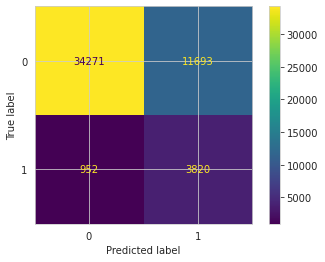

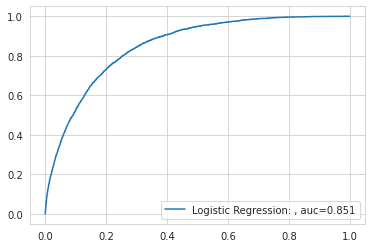

In [74]:
# Let's evaluate logistic regression
conf = confusion_matrix(Y_test,pred_test)
ConfusionMatrixDisplay(conf).plot()
plt.show()

# Calculate the ROC curve points
fpr, tpr, _ = roc_curve(Y_test, pred_test_prob[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_logreg = np.round(roc_auc_score(y_true = Y_test, y_score = pred_test_prob[:,1]), decimals = 3)

# Create and show the plot
plt.plot(fpr, tpr,label=f"Logistic Regression: , auc={auc_logreg}")
plt.legend(loc=4)
plt.show()

In [86]:
#save the trained logistic regression model 
import pickle
filename = 'logisticRegression_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
#Import the trained logistic regression model
#rf=pickle.load(open('logisticRegression_model.sav', 'rb'))

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

#Define the classifier
rf = RandomForestClassifier(n_estimators=1000, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports gini.
                       max_depth=None, # Max depth of the trees. Not necessary to change.
                       min_samples_split=2, # Minimum samples to create a split.
                       min_samples_leaf=1, # Minimum samples in a leaf. 
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.001, # Minimum impurity decrease. This is 10^-4.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=2, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
                       random_state=0, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced' # Balance the classes.
                                    )

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 1500, 500)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 110, 50)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [39]:
#fit the model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.9s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    criterion='entropy',
                                                    min_impurity_decrease=0.001,
                                                    n_estimators=1000, n_jobs=2,
                                                    oob_score=True,
                                                    random_state=0, verbose=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 60, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 600, 1100]},
                   random_state=0, verbose=2)

In [40]:
#get the optimal parameters
rf_random.best_params_

The best AUC is 0.717


{'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [41]:
#get the best random forest estimator
rf = RandomForestClassifier(n_estimators=100, # Number of trees to train
                       criterion='entropy', # How to train the trees. Also supports gini.
                       max_depth=60, # Max depth of the trees. Not necessary to change.
                       min_samples_split=5, # Minimum samples to create a split
                       min_samples_leaf=2, # Minimum samples in a leaf. 
                       max_features='auto', # Maximum number of features per split (not tree!) by default is sqrt(vars)
                       max_leaf_nodes=None, # Maximum number of nodes.
                       min_impurity_decrease=0.001, # Minimum impurity decrease. This is 10^-4.
                       bootstrap=True, # If sample with repetition. For large samples (>100.000) set to false.
                       oob_score=True,  # If report accuracy with non-selected cases.
                       n_jobs=2, # Parallel processing. Set to the number of cores you have. Watch your RAM!!
                       random_state=0, # Seed
                       verbose=1, # If to give info during training. Set to 0 for silent training.
                       warm_start=False, # If train over previously trained tree.
                       class_weight='balanced' # Balance the classes.
                                    )

In [42]:
#train the whole trainning data 
rf.fit(X_train, Y_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    3.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    7.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=60, min_impurity_decrease=0.001,
                       min_samples_leaf=2, min_samples_split=5, n_jobs=2,
                       oob_score=True, random_state=0, verbose=1)

In [75]:
#predict on test data
rf_pred_test = rf.predict(X_test)
rf_probs_test = rf.predict_proba(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.3s finished


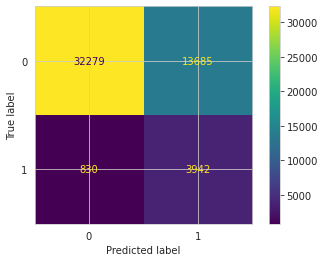

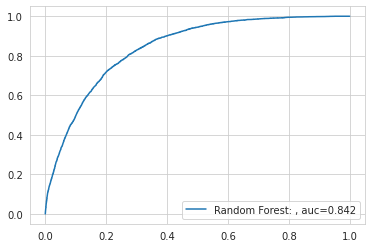

In [76]:
# Let's evaluate Random forest
conf_rf = confusion_matrix(Y_test, rf_pred_test)
ConfusionMatrixDisplay(conf_rf).plot()
plt.show()

# Calculate the ROC curve points
fpr, tpr, _ = roc_curve(Y_test, rf_probs_test[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_rf = np.round(roc_auc_score(y_true = Y_test, y_score = rf_probs_test[:,1]), decimals = 3)

# Create and show the plot
plt.plot(fpr, tpr,label=f"Random Forest: , auc={auc_rf}")
plt.legend(loc=4)
plt.show()

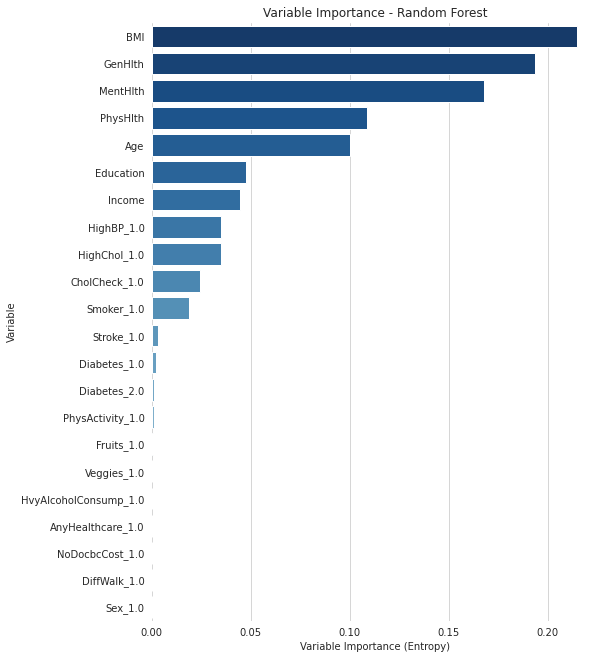

In [46]:
# Plot variable importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] 

pal = sns.color_palette("Blues", 28)

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8,11))
sns.barplot(y=X_train.columns,x=importances[indices],label="Total",palette=np.array(pal[::-1]))
plt.title("Variable Importance - Random Forest")
ax.set(ylabel="Variable",xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)
plt.show()

In [57]:
#save the trained random forest model 
import pickle
filename = 'randomForest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [61]:
#Import the trained random forest model
#rf=pickle.load(open('randomForest_model.sav', 'rb'))


## XGBClassifer

In [47]:

# XGBClassifier
gb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, booster='gbtree', gamma=0.001, random_state=0)
param_grid = dict({'n_estimators': [10, 50, 100, 200],'max_depth': [2, 3],'learning_rate' : [0.01, 0.1]})

# define grid search object
gridXGB = GridSearchCV(gb, param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1, refit = False)

In [49]:
#find the optimal hyperparameters
gridXGB.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(gamma=0.001), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [2, 3],
                         'n_estimators': [10, 50, 100, 200]},
             refit=False, scoring='roc_auc')

In [50]:
# display the optimal parameters
gridXGB.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Since the optimal parameters are the maximum values, let's increase the parameters' ranges and run the grid search again.

In [51]:
new_param_grid=dict({'n_estimators': [200, 300, 500],'max_depth': [3, 4, 5],'learning_rate' : [0.1, 0.15, 0.2]})
# define grid search object
gridXGB = GridSearchCV(gb, new_param_grid, cv = 3, scoring = 'roc_auc', n_jobs = -1, refit = False)
gridXGB.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=XGBClassifier(gamma=0.001), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.15, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [200, 300, 500]},
             refit=False, scoring='roc_auc')

In [52]:
# display the optimal parameters
gridXGB.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

So, the optimal parametes for XGBClassifier is learning_rate=0.1, max_depth=3 and n_estimators=200

In [53]:
# construct the best XGBClassifier using the optimal parameters
gb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=200, booster='gbtree', gamma=0.001, random_state=0)

In [54]:
#fit the training data
gb.fit(X_train, Y_train)

XGBClassifier(gamma=0.001, n_estimators=200)

In [77]:
#predict on test data
gb_pred_test = gb.predict(X_test)
gb_probs_test = gb.predict_proba(X_test)

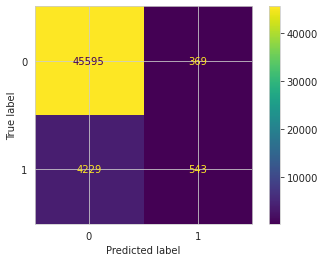

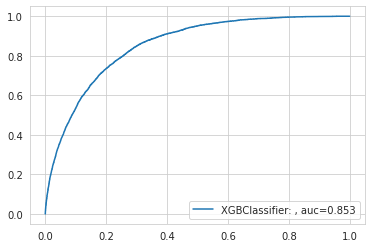

In [78]:
# Let's evaluate XGBClassifier
conf_gb = confusion_matrix(Y_test, gb_pred_test)
ConfusionMatrixDisplay(conf_gb).plot()
plt.show()

# Calculate the ROC curve points
fpr, tpr, _ = roc_curve(Y_test, gb_probs_test[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc_gb = np.round(roc_auc_score(y_true = Y_test, y_score = gb_probs_test[:,1]), decimals = 3)

# Create and show the plot
plt.plot(fpr, tpr,label=f"XGBClassifier: , auc={auc_gb}")
plt.legend(loc=4)
plt.show()

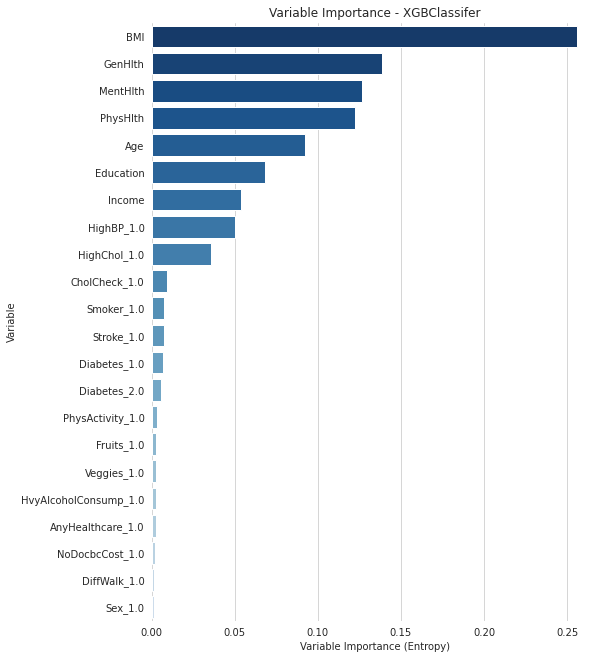

In [64]:
# Plot variable importance
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1] 

pal = sns.color_palette("Blues", 28)

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(8,11))
sns.barplot(y=X_train.columns,x=importances[indices],label="Total",palette=np.array(pal[::-1]))
plt.title("Variable Importance - XGBClassifer")
ax.set(ylabel="Variable",xlabel="Variable Importance (Entropy)")
sns.despine(left=True, bottom=True)
plt.show()

In [65]:
#save the trained XGBClassifier model 
import pickle
filename = 'XGBClassifier_model.sav'
pickle.dump(gb, open(filename, 'wb'))

## Model Selection

In [71]:
# accuracy, presicion, recall and specificity for Logistic regression
tp=conf[1][1]
tn=conf[0][0]
fp=conf[0][1]
fn=conf[1][0]
accuracy=(tp+tn)/(tp+tn+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
specificity=tn/(fp+tn)


# accuracy, presicion, recall and specificity for Random forest
tp_rf=conf_rf[1][1]
tn_rf=conf_rf[0][0]
fp_rf=conf_rf[0][1]
fn_rf=conf_rf[1][0]
accuracy_rf=(tp_rf+tn_rf)/(tp_rf+tn_rf+fp_rf+fn_rf)
precision_rf=tp_rf/(tp_rf+fp_rf)
recall_rf=tp_rf/(tp_rf+fn_rf)
specificity_rf=tn_rf/(fp_rf+tn_rf)

# accuracy, presicion, recall and specificity for XGBClassifer
tp_gb=conf_gb[1][1]
tn_gb=conf_gb[0][0]
fp_gb=conf_gb[0][1]
fn_gb=conf_gb[1][0]
accuracy_gb=(tp_gb+tn_gb)/(tp_gb+tn_gb+fp_gb+fn_gb)
precision_gb=tp_gb/(tp_gb+fp_gb)
recall_gb=tp_gb/(tp_gb+fn_gb)
specificity_gb=tn_gb/(fp_gb+tn_gb)

In [85]:
d={'model': ['Logistic Regression', 'Random forest', 'XGBClassifier'], 'accuracy':[accuracy, accuracy_rf, accuracy_gb], 
   'precision': [precision, precision_rf, precision_gb],
   'recall': [recall, recall_rf, recall_gb], 'specificity': [specificity,specificity_rf, specificity_gb],
   'AUC': [auc_logreg, auc_rf, auc_gb],
   'type II error': [fn, fn_rf, fn_gb]}

evaluation_table=pd.DataFrame(d)
evaluation_table

,model,accuracy,precision,recall,specificity,AUC,type II error
0,Logistic Regression,0.750769,0.246245,0.800503,0.745605,0.851,952
1,Random forest,0.713911,0.223634,0.826069,0.702267,0.842,830
2,XGBClassifier,0.909374,0.595395,0.113789,0.991972,0.853,4229


Conclusion: From the AUC value, XGBClassifier is the best model. However, in reality, type II error (false negative) is that we fail to detect the disease, which is definitely required to minimize and is more severe than type I error. We prefer model with less type II error. Therefore, Random forest will be the best model for this heart disease detection purpose.